In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [55]:
# Load and preprocess the data
data = pd.read_csv('digit-recognizer/train.csv')
data = np.array(data)
np.random.shuffle(data)


In [56]:
# Split into dev and training sets
dev_size = 1000
data_dev = data[:dev_size].T
Y_dev = data_dev[0]
X_dev = data_dev[1:] / 255.

data_train = data[dev_size:].T
Y_train = data_train[0]
X_train = data_train[1:] / 255.
m = X_train.shape[1]

In [29]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
X_dev = data_dev[1:n]
Y_dev = data_dev[0]

data_train = data[1000:m].T
X_train = data_train[1:n]
Y_train = data_train[0]



In [57]:
# Initialization
def init_params():
    W1 = np.random.randn(64, 784) * 0.01
    b1 = np.zeros((64, 1))
    W2 = np.random.randn(10, 64) * 0.01
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

# Activation functions
def ReLU(Z):
    return np.maximum(0, Z)

def deriv_ReLU(Z):
    return (Z > 0).astype(float)

def softmax(Z):
    Z -= np.max(Z, axis=0, keepdims=True)
    expZ = np.exp(Z)
    return expZ / np.sum(expZ, axis=0, keepdims=True)

# Forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1 @ X + b1
    A1 = ReLU(Z1)
    Z2 = W2 @ A1 + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# One-hot encoding
def one_hot(Y):
    one_hot_Y = np.zeros((Y.max() + 1, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

# Backward propagation
def back_prop(Z1, A1, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = dZ2 @ A1.T / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = W2.T @ dZ2 * deriv_ReLU(Z1)
    dW1 = dZ1 @ X.T / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return dW1, db1, dW2, db2

# Update parameters
def update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2


In [67]:
# Predictions and accuracy
def predict(A2):
    return np.argmax(A2, axis=0)

def accuracy(preds, Y):
    return np.mean(preds == Y)

# Training loop
def train(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    losses = []
    for i in range(iterations + 1):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, A2, W2, X, Y)
        W1, b1, W2, b2 = update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        loss = -np.mean(np.log(A2[Y, range(m)] + 1e-8))  # cross-entropy
        losses.append(loss)


        if i % 50 == 0:
            preds = predict(A2)
            acc = accuracy(preds, Y)
            print(f"Iteration {i} - Training Accuracy: {acc:.4f}")
    plt.plot(losses)
    plt.title("Training Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

    return W1, b1, W2, b2

Iteration 0 - Training Accuracy: 0.1051
Iteration 50 - Training Accuracy: 0.3830
Iteration 100 - Training Accuracy: 0.7434
Iteration 150 - Training Accuracy: 0.8288
Iteration 200 - Training Accuracy: 0.8598
Iteration 250 - Training Accuracy: 0.8768
Iteration 300 - Training Accuracy: 0.8864
Iteration 350 - Training Accuracy: 0.8936
Iteration 400 - Training Accuracy: 0.8979
Iteration 450 - Training Accuracy: 0.9011
Iteration 500 - Training Accuracy: 0.9044


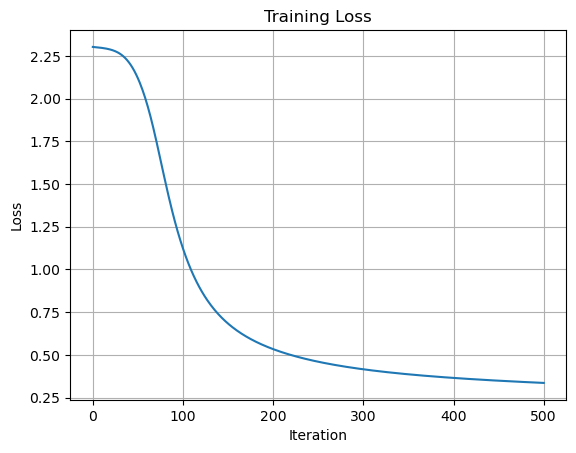

In [68]:
# Run training
W1, b1, W2, b2 = train(X_train, Y_train, iterations=500, alpha=0.1)


In [61]:
# Evaluate on dev set
_, _, _, A2_dev = forward_prop(W1, b1, W2, b2, X_dev)
pred_dev = predict(A2_dev)
print("Dev Set Accuracy:", accuracy(pred_dev, Y_dev))


Dev Set Accuracy: 0.905


In [62]:
def show_sample_predictions(X, Y, W1, b1, W2, b2, count=10):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    preds = predict(A2)
    for i in range(count):
        image = X[:, i].reshape(28, 28) * 255
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {Y[i]}, Predicted: {preds[i]}")
        plt.axis('off')
        plt.show()

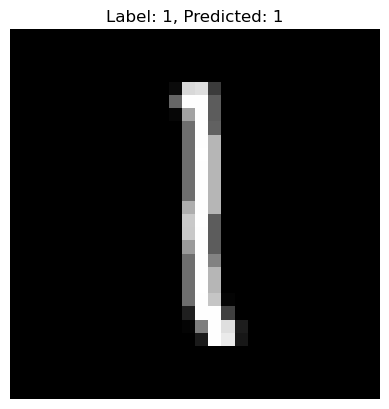

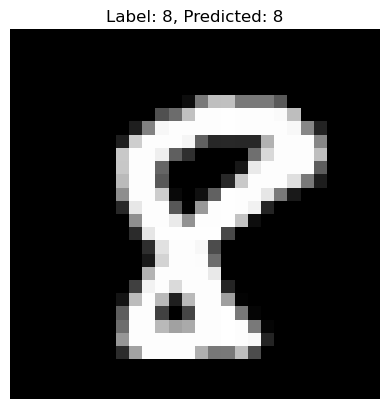

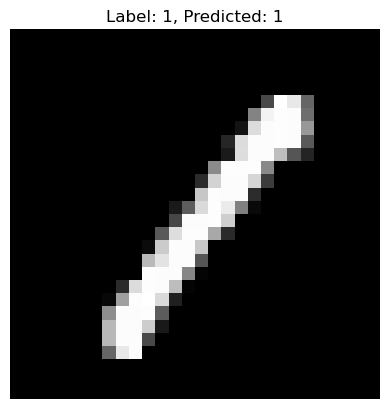

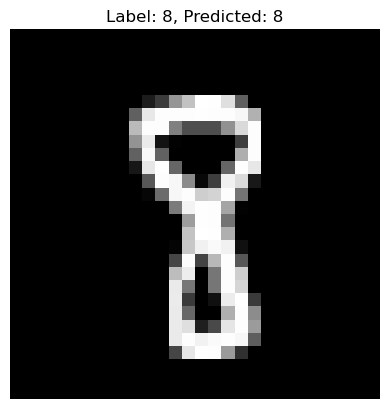

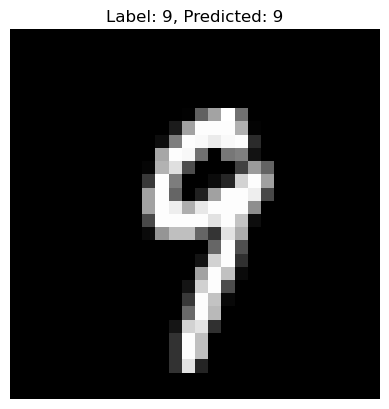

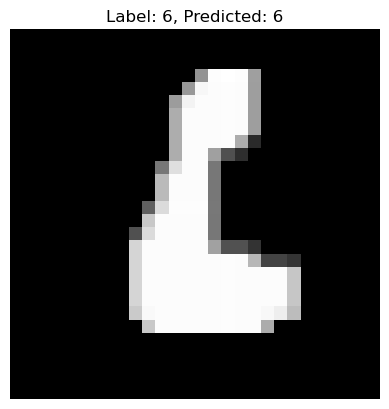

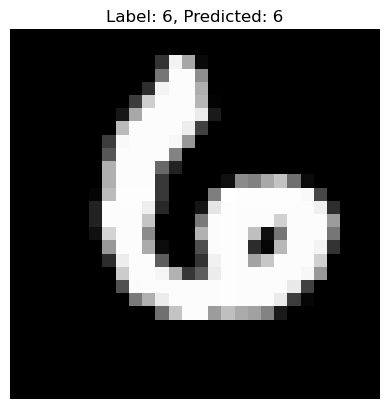

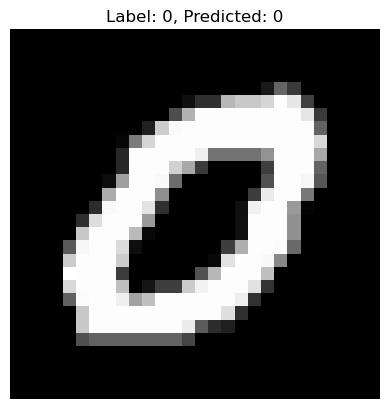

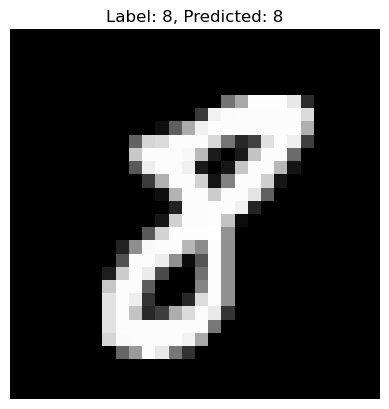

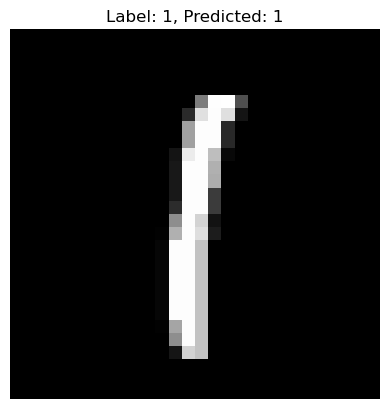

In [63]:
show_sample_predictions(X_dev, Y_dev, W1, b1, W2, b2)


In [64]:
def save_weights(W1, b1, W2, b2, filename='model_weights.npz'):
    np.savez(filename, W1=W1, b1=b1, W2=W2, b2=b2)

def load_weights(filename='model_weights.npz'):
    data = np.load(filename)
    return data['W1'], data['b1'], data['W2'], data['b2']


In [65]:
save_weights(W1, b1, W2, b2)
W1, b1, W2, b2 = load_weights()
